# Assignment 2, Eric Johansson & Max Sonnelid

# Introduction
### This assigments aims to increase knowledge about preproccesing of data

# Task 1 -  Working with a dataset with categorical features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Reading the data

In [2]:
from sklearn.model_selection import train_test_split
  
# Read the CSV file.
trainData = pd.read_csv("data/adult_train.csv", skiprows=0)
testData = pd.read_csv("data/adult_test.csv", skiprows=0)

In [3]:
train_data_shuffled = trainData.sample(frac=1.0, random_state=0)
test_data_shuffled = testData.sample(frac=1.0, random_state=0)

In [4]:
X_train = train_data_shuffled.drop('target', axis=1)
X_test = test_data_shuffled.drop('target', axis=1)
Y_train = train_data_shuffled['target'].dropna() 
Y_test = test_data_shuffled['target'].dropna()

### Convert dataFrame to list of dictionaries

In [5]:
dicts_for_my_training_data = X_train.to_dict('records')
dicts_for_my_test_data = X_test.to_dict('records')


In [6]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
X_train_encoded = dv.fit_transform(dicts_for_my_training_data)
X_test_encoded = dv.transform(dicts_for_my_test_data)

### Creating a pipeline

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
  
pipeline = make_pipeline(
  DictVectorizer(),
  RandomForestClassifier()
)

In [8]:
from sklearn.metrics import accuracy_score

pipeline.fit(dicts_for_my_training_data, Y_train)
print(accuracy_score(Y_test, pipeline.predict(dicts_for_my_test_data)))

0.8522818008721823


# Task 2

## Underfitting and overfitting in decision tree classifiers.

In [10]:
dt_train_score = np.array([])
dt_test_score = np.array([])
depths = list(range(1, 20))

for i in depths:
    pipeline = make_pipeline(DictVectorizer(), DecisionTreeClassifier(max_depth=i))
    pipeline.fit(dicts_for_my_training_data, Y_train)
    dt_train_score = np.append(dt_train_score, accuracy_score(Y_train, pipeline.predict(dicts_for_my_training_data)))
    dt_test_score = np.append(dt_test_score,  accuracy_score(Y_test, pipeline.predict(dicts_for_my_test_data)))



print("Train Score: ")
print(dt_train_score)
print("Test Score: ")
print(dt_test_score)

Train Score: 
[0.75919044 0.82823009 0.843893   0.84395442 0.85209299 0.85694543
 0.85863456 0.86063082 0.86397838 0.8703971  0.87488099 0.8799484
 0.88857836 0.89502779 0.90402629 0.91105924 0.91907497 0.92672215
 0.93390866]
Test Score: 
[0.76377372 0.83066151 0.8447884  0.84466556 0.85203612 0.85725693
 0.85645845 0.85676555 0.85762545 0.86051225 0.85793256 0.85572139
 0.85019348 0.84970211 0.84503409 0.84343714 0.83809348 0.83821633
 0.83182851]


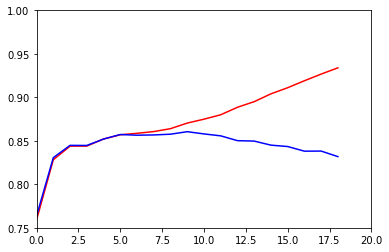

In [11]:
plt.xlim(0, 20)
plt.ylim(0.75, 1)
plt.plot(dt_train_score, 'r') # plotting t, a separately 
plt.plot(dt_test_score, 'b') # plotting t, b separately 
plt.show()

Up until a max_depth of five, the training and test data is basically identical in accuracy, much like they were in the previous assignemnt (when looking at mean squared error.) Though, after using depth bigger than five, the training score continue to increases in a linear fashion whereas the testdata peaks around 0.85 in accuracy and then slowly decreases. An interesting observation is that the generalization gap starts at max_depth 5, but the test data gets the highest accuracy at max_depth 8. This means that even though the model is slightly overfitted (at depth = 8), it still performs better than when it wasnt overfitted (at depth = 5).  

### Underfitting and overfitting in random forest classifiers.

Checking under- and overfitting without tweaking the hyperparameter "n_estimators "

In [12]:
train_score = np.array([])
test_score = np.array([])
depths = list(range(1, 20))

for i in depths:
    pipeline = make_pipeline(DictVectorizer(), RandomForestClassifier(max_depth=i))
    pipeline.fit(dicts_for_my_training_data, Y_train)
    train_score = np.append(train_score, accuracy_score(Y_train, pipeline.predict(dicts_for_my_training_data)))
    test_score = np.append(test_score,  accuracy_score(Y_test, pipeline.predict(dicts_for_my_test_data)))



print("Train Score: ")
print(train_score)
print("Test Score: ")
print(test_score)

Train Score: 
[0.75919044 0.77316421 0.79377169 0.8266638  0.83667578 0.84564356
 0.85049599 0.85620835 0.86056939 0.86336415 0.86738737 0.87064279
 0.87457388 0.88056264 0.88394091 0.88983754 0.89671693 0.90546973
 0.9077731 ]
Test Score: 
[0.76377372 0.77642651 0.79737117 0.82537928 0.83797064 0.84503409
 0.84896505 0.85375591 0.85596708 0.85694982 0.86020515 0.86051225
 0.86069652 0.86204779 0.86296911 0.86192494 0.86247773 0.86425895
 0.86241631]


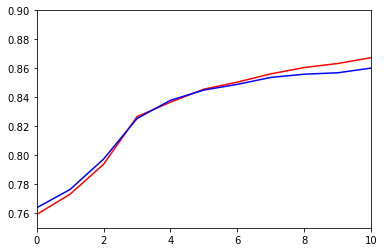

In [13]:
plt.xlim(0, 10)
plt.ylim(0.75, 0.9)
plt.plot(train_score, 'r') # plotting t, a separately 
plt.plot(test_score, 'b') # plotting t, b separately 
plt.show()

### Checking under- and overfitting for different "n_estimators " using a Random Forest

In [25]:
import time

running_time = []

total_train_score = [[]] * 0
total_test_score = [[]] * 0
n_estimator = [1,40,80,120,160,200] #[1,5,10,50,100,200]
depth = range(1, 20)

for estimator in n_estimator:
    start = time.time()

    train_score = np.array([])
    test_score = np.array([])
    

    for i in depth:
        pipeline = make_pipeline(DictVectorizer(), RandomForestClassifier(n_estimators = estimator, max_depth=i, n_jobs=-1))
        pipeline.fit(dicts_for_my_training_data, Y_train)
        train_score = np.append(train_score, accuracy_score(Y_train, pipeline.predict(dicts_for_my_training_data)))
        test_score = np.append(test_score,  accuracy_score(Y_test, pipeline.predict(dicts_for_my_test_data)))

    #print("Train Score: ")
    #print(train_score)
    #print("Test Score: ")
    #print(test_score)

    stop = time.time()
    print(f"Training time: {stop-start}s")
    running_time = np.append(running_time, stop-start)

    total_train_score.append(train_score)
    total_test_score.append(test_score)

Training time: 14.92697286605835s
Training time: 20.260266065597534s
Training time: 26.07765507698059s
Training time: 31.815269947052002s
Training time: 37.789705991744995s
Training time: 44.35427784919739s


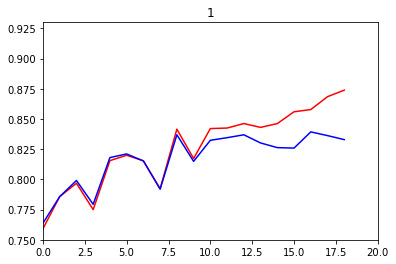

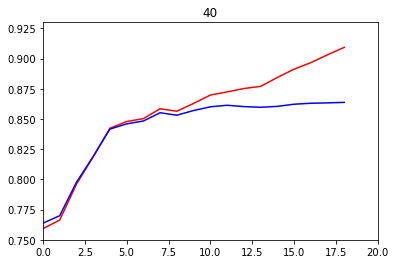

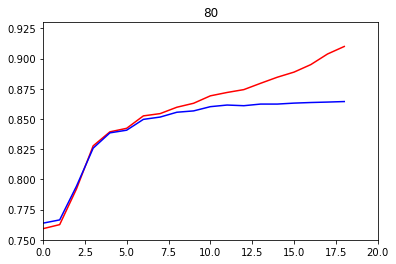

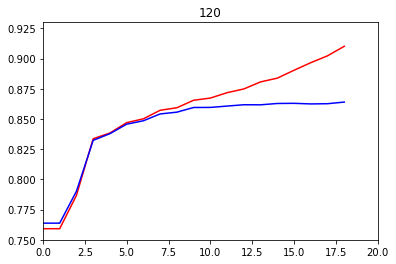

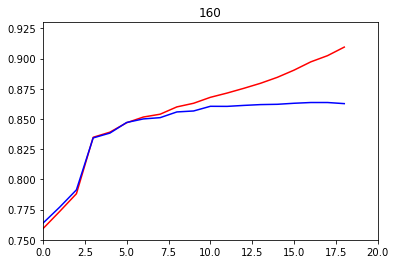

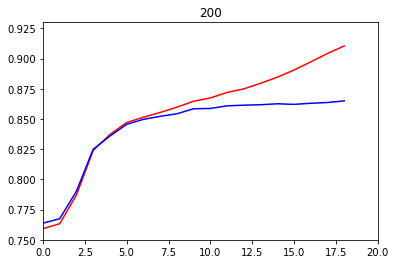

In [26]:
for i in range(0,6):

    plt.xlim(0, 20)
    plt.ylim(0.75, 0.93)
    plt.title(n_estimator[i])

    plt.plot(total_train_score[i], 'r') # plotting t, a separately 
    plt.plot(total_test_score[i], 'b') # plotting t, b separately 
    plt.show()

With an increasing number of estimators, rather surprisingly, the best observed test set accuracy does not increase any significantly, but stays at 0.850 for all tried number of estimators. The best observed test set accuracy is not even reached faster with a higher number of estimators. The only difference is that the curve is smoother and monotonely increasing, which can be explained that the Random Forest Classifier is an average of the individual trees. With a higher number of trees (estimators), the accuracy for the individual trees probably does not increase significantly, but with a higher number of trees the average gets more stable (i.e, lower volatility). The behavior of the generalization gap does not differ significantly between the number of estimators.

### Comparing a decision tree vs a random forest with n_estimators=1

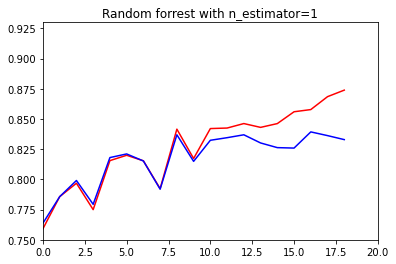

In [27]:
plt.xlim(0, 20)
plt.ylim(0.75, 0.93)
plt.title("Random forrest with n_estimator=1")
plt.plot(total_train_score[0], 'r') # plotting t, a separately 
plt.plot(total_test_score[0], 'b') # plotting t, b separately 
plt.show()

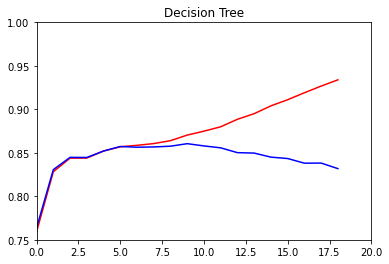

In [28]:
plt.xlim(0, 20)
plt.ylim(0.75, 1)
plt.title("Decision Tree")
plt.plot(dt_train_score, 'r') # plotting t, a separately 
plt.plot(dt_test_score, 'b') # plotting t, b separately 
plt.show()

The main differences between a decision tree and a random forrest with n_estimators set to 1 is that, while both models consists of one tree each, the decision tree uses all rows in the dataset while the random forrest are randomly selecting rows from the original dataset (bagging) which means that some rows could be left out (and the same row could be used several times). A similar thing happens to the columns. While the decisiontree looks through all features before deciding which one to use, the random forrest only takes a random selection into consideration. 

This is why the random forrest has higher volatility in accuracy which can be seen in last two figures. To describe further, since only some parameters are used (and different each iteration) the accuracy goes up and down depending on how useful these parameters are. However, when having a higher max_depth, the possibility that the random forrest will include important parameters increases, and this 
can be seen in the first figure wherer the accuracy increases. 

## Checking running time

Below is a graph with a linearly increasing x-axis. There it is obvious that the time is in fact increasing linearly as a function of n_estimators. If we had access to even more computing power, it would be interesting to test if the time would continue to increase linearly when n_estimators goes up to 1000. After some thinking, it seems reasonable that that would be the case since the algorithm only loops through a larger amount of small trees. Since there arent any nestled forloops, the time complexity should be O(n). 

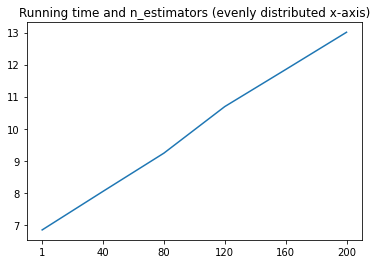

In [19]:
x = range(0,6)
y = running_time
my_xticks = n_estimator
plt.title("Running time and n_estimators (evenly distributed x-axis)")
plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.show()

# Task 3

## Checking importances for all features used in the Random Forrest

In [30]:
pipeline2 = make_pipeline(
  DictVectorizer(),
  RandomForestClassifier(max_depth=5, n_estimators = 1)
)

pipeline2.fit(dicts_for_my_training_data, Y_train)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, n_estimators=1))])

In [31]:
importances = pipeline2.steps[1][1].feature_importances_
names = pipeline2.steps[0][1].feature_names_

names_arr = np.array(names)

tot = np.vstack((names_arr, importances)).T

df = pd.DataFrame({'Feature':tot[:,0], 'Importance': tot[:,1]})
df['Importance'] = df['Importance'].astype(float)
df = df.sort_values(by=['Importance'], ascending = False)
df1 = df.loc[(df['Importance']>0)]
df1.head(15)

,Feature,Importance
1,capital-gain,0.354845
0,age,0.290503
24,marital-status=Married-civ-spouse,0.135454
98,sex=Male,0.134676
26,marital-status=Never-married,0.029975
91,relationship=Husband,0.024131
92,relationship=Not-in-family,0.008238
13,education=Bachelors,0.006838
2,capital-loss,0.005018
96,relationship=Wife,0.003301


### Small note about the most important features

The most important feature, in this case, was capital gain. Even though it is not clearly defined what capital gain means in this case, we define it as having income from stocks or bonds. If this is a correct interpretation, then it seams very reasonable to have that as very important aspect since 1. that is an extra source of income besides a regular salary and 2. its an indicator that this person can afford to save money -> high salary. 

Age does also seem useful to predict a persons salary, since it seams likely that a persons salary increases over time. It is much more usual to get a raise in wage rather than the opposite.

That being married is considered an important feature is harder to explain. One possible explanation could be that having a high salary is attractive for some people and thus increasing the chance of getting married. This is perhaps not the only explanation, but still make some sense. 

Being a male also seems like a differentiating feature as it is common knowledge that men in general earn more than women (thus more men than women earn above 50K).

## Doing the same thing again, now with a decisionTree Classifier

In [32]:
pipeline3 = make_pipeline(
  DictVectorizer(),
  DecisionTreeClassifier(max_depth=5)
)

pipeline3.fit(dicts_for_my_training_data, Y_train)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5))])

In [35]:
importances = pipeline3.steps[1][1].feature_importances_
names = pipeline3.steps[0][1].feature_names_

names_arr = np.array(names)

tot = np.vstack((names_arr, importances)).T

df = pd.DataFrame({'Feature':tot[:,0], 'Importance': tot[:,1]})
df['Importance'] = df['Importance'].astype(float)
df = df.sort_values(by=['Importance'], ascending = False)
df2 = df.loc[(df['Importance']>0)]
df2.head(15)

,Feature,Importance
24,marital-status=Married-civ-spouse,0.465496
3,education-num,0.233568
1,capital-gain,0.217871
2,capital-loss,0.046142
21,hours-per-week,0.021999
0,age,0.011760
20,fnlwgt,0.001722
17,education=Preschool,0.000395
77,occupation=Handlers-cleaners,0.000384
105,workclass=Self-emp-not-inc,0.000297


### Small note about the most important features

The only main feature that differs compared to the result above is the education-num (which we interprets as nr of years in school). It seem very reasonable that a higher level of education increases the possibility of a higher salary. 

In [34]:
print(f"# important features - Random Forrest: {len(df1)}")
print(f"# important features - Decision Tree: {len(df2)}")

# important features - Random Forrest: 20
# important features - Decision Tree: 12


The number of features with an importance higher than zero increases significantly when using RandomForestClassifier compared to DecisionTreeClassifier. This can be explained by the fact that RandomForestClassifier selects features and data on random for each estimator and therefore the importance of each feature differs for each estimator. The average feature importance in Random Forest therefore includes many more features weith an importance higher than zero, which is not possible in DecisionTreeClassifier as only one estimator is present and all importances of features is only calculated once.

With an increasing max_depth, the number of features with an importance higher than zero is also increasing significantly for both Random Forest and Decision Tree. This can easily be explained by the fact that more features can be included with a higher max_depth.

With an increasing number of estimators, the number of features with an importance higher than zero is also increasing. This is reasonable as with more estimators, different kinds of features are included in the individual trees and the total amount of features with an importance thus increases.

## Other methods to compute importance

In the code above, the importance of the different variables has been calculated through "gini impurity". According to Parr et al. (2018), this way of calculating importance has its drawbacks. This method is biased towards data continous features or high cardinality categorical varibales (Lewinson, 2019). However, their exist popular alternaitves of calculating importance, namely permutation feature importance and drop column feature importance.

URL of Lewinson, 2019: https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

#### Permutation feature importance

To describe to approach in short, the test data is slightly tweaked through multiple iterations. At each iteration, the values of one feature is switched with random values. In this way, the score can be compared with score using the original data set to scale the importance of each feature. This has turned out to yield more accurate importance compared to the above mentioned method. A benefit of using this model is that it does not need to be retrained to rate the importance of each feature. Still, there exist some problem of correlated predictors.

#### Drop column feature importance

Drop column is, according to most sources, the best apporach if computer power is not an issue. What it does is that is drops an entire column/feature of the model and then retrains it. Then, the same test set is used to calculate the accuracy. This procedure is repeated until all feature has been left out, one at the time. In this way, it is easy to see how much each feature matter to get high accuracy. A clear benefit of this approach is it yields high accuracy. However, it could be very time consuming to retrain the model each time a new feature is to be tested.

#### Collinearity / grouping of variables



An important aspect to note is how the feature importance is affected by collinearity and grouping of variables. Let's give an example of collinearity. One is going to predict the carbon dioxide emissions of a country and have data about both GDP per capita, number of flight travels per person and heating use per house. Then GDP per capita and flight travels per person are probably strongly correlated as richer countries can afford to fly more. If dropping the column flight travels per person, it probably does not affect the prediction of carbon dioxide emissions since the same information can be retrieved only looking at GDP per capita. This phenomenon is called that GDP per capita and flights per person is collinear.

Similarly, two variables may have a stronger importance together than individually. A good example is longitude and latitude when predicting house prices. Individually longitude and latitude do probably not have any big feature importance, but as a group these two features probably affect the house prices a lot.

Both collinearity and grouping of variables is important to have in mind when interpreting the feature importance and is it not as easy as just calculating individual feature importances.